In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("combined_data.csv")

In [3]:
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
data.tail()

,label,text
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...
83447,1,get the most out of life ! viagra has helped m...


In [5]:
# EDA
data.isnull().sum()

label    0
text     0
dtype: int64

In [6]:
eda_data = data.copy()

In [7]:
eda_data['NumWords'] = eda_data['text'].apply(lambda x: len(x))

In [8]:
eda_data.head()

,label,text,NumWords
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

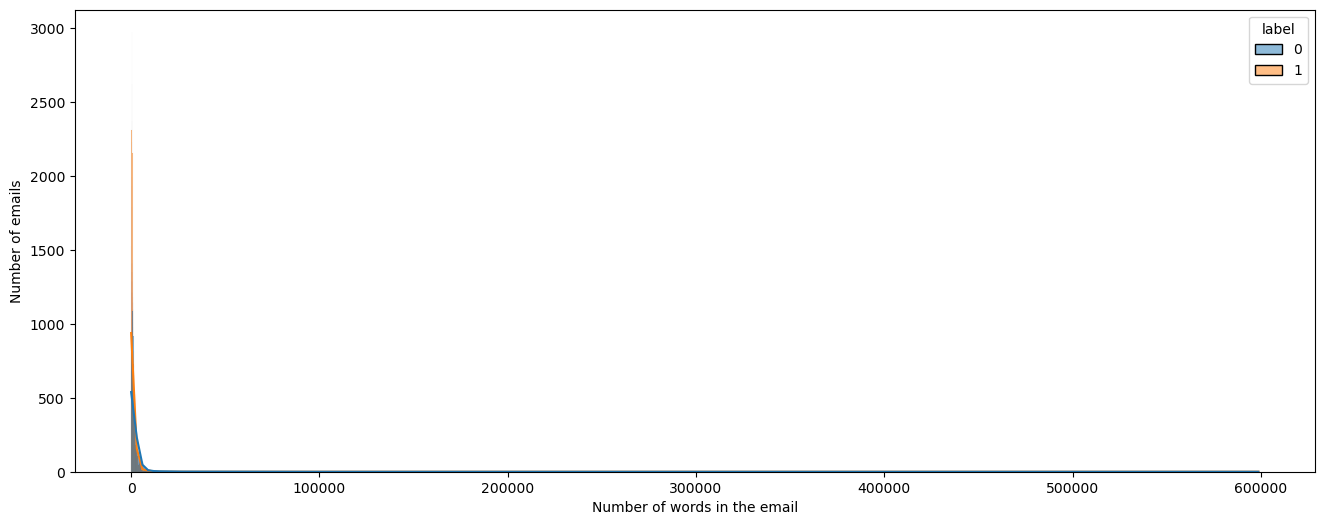

In [10]:
fig, axis = plt.subplots(figsize=(16,6))
sns.histplot(data= eda_data, x='NumWords', hue='label', ax=axis, kde=True)
axis.set_xlabel('Number of words in the email')
axis.set_ylabel('Number of emails')
plt.show()

In [11]:
import re

In [12]:
def preprocess(text):
    message = text.lower()
    message = re.sub('[^a-zA-Z0-9 \n\.]','', message)
    return message

In [13]:
data['text'] = data['text'].apply(lambda x: preprocess(x))

In [14]:
data['text']

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get your medircations online qnb ikud v...
2         computer connection from cnn com wednesday es...
3        university degree obtain a prosperous future m...
4        thanks for all your answers guys i know i shou...
                               ...                        
83443    hi given a date how do i get the last date of ...
83444    now you can order software on cd or download i...
83445    dear valued member canadianpharmacy provides a...
83446    subscribe change profile contact us long term ...
83447    get the most out of life  viagra has helped mi...
Name: text, Length: 83448, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer()

In [17]:
X = vectorizer.fit_transform(data['text'])
Y = data['label']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Split data into train and test as we did alwasys
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [25]:
from sklearn.linear_model import LogisticRegression

In [28]:
logit = LogisticRegression(max_iter=1000)

In [29]:
logit.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
y_predict = logit.predict(X_test)

In [33]:
accuracy_score(Y_test, y_predict)

0.9850445786597641

In [38]:
matrix = confusion_matrix(Y_test, y_predict)

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
display = ConfusionMatrixDisplay(matrix)

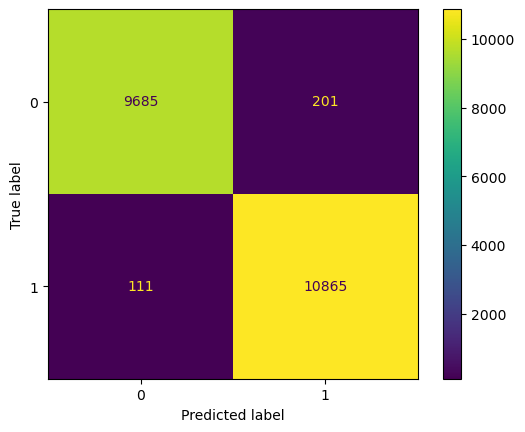

In [41]:
display.plot()

In [59]:
def precticEmail(email):
    message_vector = vectorizer.transform([email])
    result = logit.predict(message_vector)
    print(result)
    return "Spam" if result[0] == 1 else "Not Spam"

In [60]:
text = "Our company is seeking passionate YouTube channel owners who are interested in promoting our new software Corel Video Editor.After admiring your creative content on your channel, we believe that partnering with you can lead to mutual success.If you are interested in collaborating with us, please respond to this email and we will provide you with the contract details and the software trailer."

In [61]:
precticEmail(text)

[1]


'Spam'

In [62]:
text = "Checking in one last time to see if you have any questions about the program or the application. If it's not for you, all good - just ignore the email because I won't be pinging you again :)"

In [63]:
precticEmail(text)

[1]


'Spam'

In [64]:
text = "Hello, how are you?"

In [65]:
precticEmail(text)

[1]


'Spam'

In [67]:
text = "The central hub for editors, with resources, links, tasks, and announcements."

In [68]:
precticEmail(text)

[1]


'Spam'

In [69]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [70]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [71]:
def metrics(model):
    y_predict = model.predict(X_test)
    print(accuracy_score(Y_test, y_predict))
    matrix = confusion_matrix(Y_test, y_predict)
    display = ConfusionMatrixDisplay(matrix)
    display.plot()

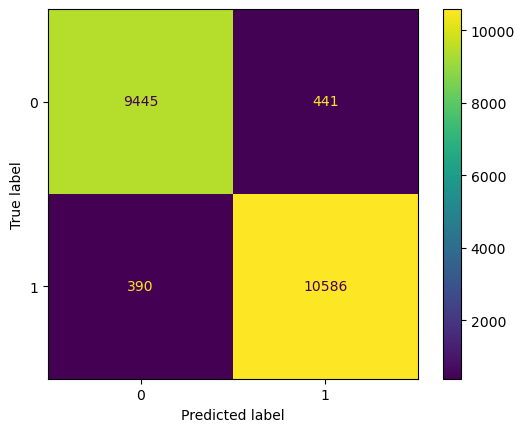

In [72]:
metrics(tree)

In [73]:
text = "The central hub for editors, with resources, links, tasks, and announcements."
precticEmail(text)

[1]


'Spam'

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
forest = RandomForestClassifier()

In [76]:
forest.fit(X_train, Y_train)

RandomForestClassifier()

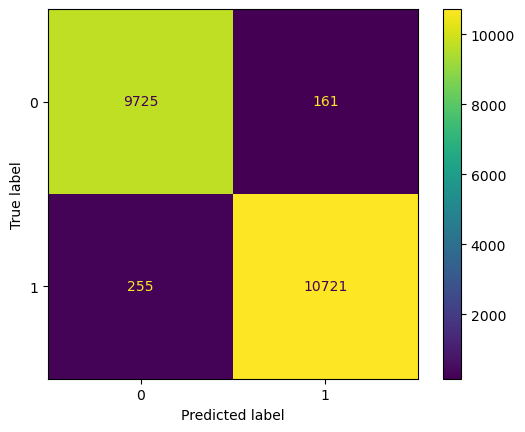

In [81]:
metrics(forest)

In [79]:
text = "Hello"
precticEmail(text)

[1]


'Spam'

In [80]:
accuracy_score(Y_test, y_predict)

0.9850445786597641